# Bài tập lập trình: Logistic Regression

```
ProtonX - TensorFlow Class 
```

### Hướng dẫn làm bài 
- Trong bài tập này bạn sẽ sử dụng Python 3.


### [Quan trọng] Chú ý
- **Không sử dụng hàm `input()` tại bất kỳ dòng lệnh nào**


Các bạn sẽ thực hiện `code` trong các phần hiển thị `#TODO` và thay thế các vị trí `None`.

Sau khi viết xong Code của bạn, bạn hãy ấn "SHIFT"+"ENTER" để thực hiện chạy lệnh của Cell đó. 

---
Điểm số:
* 10 điểm / Câu

Tiêu chí chấm điểm:
* Phải có log quá trình training
* Độ chính xác mô hình trên 89%

In [2]:
!wget https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt

--2022-09-30 13:38:59--  https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘marks.txt.1’

marks.txt.1         100%[===================>]   3.69K  --.-KB/s    in 0s      

2022-09-30 13:38:59 (71.5 MB/s) - ‘marks.txt.1’ saved [3775/3775]



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('marks.txt')

In [5]:
X = df.iloc[:, :-1]

In [6]:
df

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
...,...,...,...
94,83.489163,48.380286,1
95,42.261701,87.103851,1
96,99.315009,68.775409,1
97,55.340018,64.931938,1


In [7]:
Y = df.iloc[:, -1]

Hiển thị dữ liệu

In [8]:
reds = df.loc[Y == 0] # Reds: 0

In [9]:
blues = df.loc[Y == 1] # Blues: 1

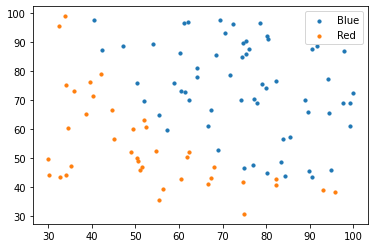

In [10]:
plt.scatter(blues.iloc[:, 0], blues.iloc[:, 1], s=10, label='Blue')
plt.scatter(reds.iloc[:, 0], reds.iloc[:, 1], s=10, label='Red')
plt.legend()
plt.show()

Tách thành bộ Train và Test

In [11]:
X = df.iloc[:, :-1]
X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
Y = df.iloc[:, -1]
Y = np.reshape(Y.to_numpy(), (Y.shape[0], 1))

In [12]:
trainX, testX = X[:80], X[80:]
trainY, testY = Y[:80], Y[80:]

Định nghĩa các hàm

In [13]:
def cal_z(x, theta):
    """
    Parameters
    ----------
    x shape: (m, 3) 
    theta shape: (3, 1)
    Returns
    ----------
    z shape (m, 1)
    """
    # TODO 1
    return np.dot(x, theta)

In [14]:
def sigmoid(z):
    """
    Parameters
    z shape: (m, 1)
    Returns
    output shape: (m, 1)
    """
    # TODO 2
    return 1/(1 + np.exp(-z))

In [16]:
def cal_h_theta(x, theta):
    """
    Parameters
    ----------
    x shape: (m, 3)
    theta shape: (3, 1)
    Returns
    ----------
    output shape: (m, 1)
    """
    # TODO 3
    z = cal_z(x, theta)
    return  sigmoid(z)

In [17]:
def cost_func(x, y, theta):
    """
    Parameters
    ----------
    x shape: (m, 3)
    y shape: (m, 1)
    theta shape: (3, 1)
    Returns
    ----------
    loss: float
    """
    # TODO 4
    h_theta = cal_h_theta(x, theta)
    loss = -(y*np.log(h_theta) + (1-y)*np.log(1-h_theta))
    return np.mean(loss)

In [18]:
def gradient(X, y, theta):
    """
    Parameters
    ----------
    X shape: (m, 3)
    y shape: (m, 1)
    theta shape: (3, 1)
    Returns
    ----------
    grad shape: (3, 1)
    """
    # TODO 5
    h_theta = cal_h_theta(X, theta)
    grad = np.mean(np.dot(X.T, (h_theta - y)), axis=0)
    return grad.reshape((grad.shape[0],1))

Chuẩn hóa dữ liệu

In [19]:
# Đưa về phân phối chuẩn đơn vị trên cả tập train và test + không sử dụng thư viện ngoài numpy
def normalize_data(train_x, test_x):
    # TODO 6 + 7
    train_mean = np.mean(train_x, axis=(0,1), dtype=np.float64, keepdims=True)
    train_std = np.std(train_x, axis=(0,1), dtype=np.float64, keepdims=True)
    
    train_x = (train_x - train_mean)/train_std
    test_x = (test_x - train_mean)/train_std
    return train_x, test_x

In [20]:
trainX, testX = normalize_data(trainX, testX)

Tiến hành training

In [34]:
epochs = 2300
learning_rate = 0.01
theta = np.random.normal(size=3).reshape((3, 1))
for e in range(epochs):
    # TODO 8: Tính gradient
    grad = gradient(trainX, trainY, theta)
    
    # TODO 9: Update theta
    theta = theta - learning_rate *grad
    # TODO 10
    total_cost = cost_func(trainX, trainY, theta)

       
    if e % 100 == 0:
        print(total_cost)
    
print('Training finished')

0.5623520214453055
0.27957704354666796
0.24123118767585158
0.2268497876256106
0.2197001250654167
0.21561912010613793
0.21308985087655383
0.21143451343847647
0.21030854626144543
0.20952044976325404
0.2089566142499919
0.20854620673486918
0.20824331237615884
0.20801722679685392
0.20784688946651916
0.20771754867605371
0.2076186891492175
0.2075427039122466
0.2074840204290876
0.207438512448837
0.2074030962976071
0.20737544898607574
0.2073538084003546
Training finished


Tiến hành dự đoán

In [35]:
predicted_classes = (cal_h_theta(testX, theta) >= 0.5).astype(int)

In [36]:
accuracy = np.mean(predicted_classes == testY) * 100

In [37]:
accuracy

89.47368421052632

Yêu cầu độ chính xác lớn hơn 89%

In [38]:
accuracy > 89

True